            x         y  slope_deg
0  114.182867 -7.884489  89.999415
1  114.183145 -7.884489  89.999344
2  114.183422 -7.884489  89.998762
3  114.183700 -7.884489  89.997910
4  114.183978 -7.884489  89.996833


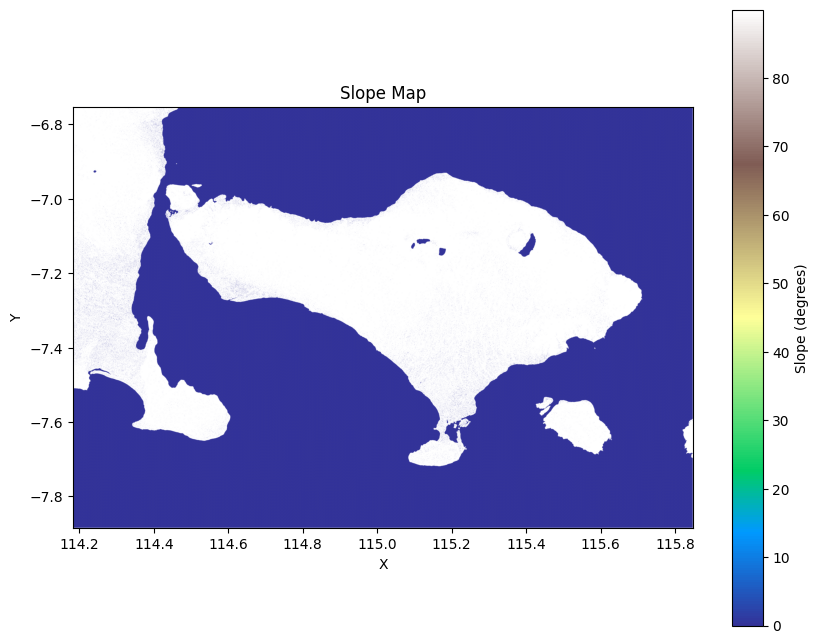

In [2]:
# === Step 1: Install library yang dibutuhkan ===
!pip install rasterio geopandas pandas matplotlib

# === Step 2: Import library ===
import rasterio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# === Step 3: Masukkan path ke file TIF (upload file dulu di Colab, misalnya 'your_dem_file.tif') ===
# Gantilah 'your_dem_file.tif' dengan nama file kamu
tif_path = '/content/DEM SRTM 30M BALI.tif'

# === Step 4: Buka file raster ===
with rasterio.open(tif_path) as src:
    dem = src.read(1)  # membaca band pertama (umumnya DEM ada di band pertama)
    transform = src.transform
    pixel_size_x = transform.a
    pixel_size_y = -transform.e

# === Step 5: Hitung slope ===
# Perhitungan dengan metode Sobel (atau central differences)

# Hitung gradien arah X dan Y
grad_x, grad_y = np.gradient(dem, pixel_size_x, pixel_size_y)

# Hitung slope dalam derajat
slope_rad = np.arctan(np.sqrt(grad_x**2 + grad_y**2))
slope_deg = np.degrees(slope_rad)

# === Step 6: Flatten array menjadi DataFrame ===
# Siapkan array koordinat X,Y
nrows, ncols = dem.shape
x_coords = np.arange(ncols) * pixel_size_x + transform.c
y_coords = np.arange(nrows) * pixel_size_y + transform.f

# Buat grid koordinat
xx, yy = np.meshgrid(x_coords, y_coords)

# Flatten semua array
df = pd.DataFrame({
    'x': xx.flatten(),
    'y': yy.flatten(),
    'slope_deg': slope_deg.flatten()
})

# === Step 7: Tampilkan DataFrame ===
print(df.head())

# === Step 8 (Opsional): Plot slope ===
plt.figure(figsize=(10, 8))
plt.imshow(slope_deg, cmap='terrain', extent=(x_coords.min(), x_coords.max(), y_coords.min(), y_coords.max()))
plt.colorbar(label='Slope (degrees)')
plt.title('Slope Map')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


✅ Unzip selesai. Isi folder unzip:
   ADMINISTRASIKECAMATAN_AR.sbn
   ADMINISTRASIKECAMATAN_AR.shp
   ADMINISTRASIKECAMATAN_AR.prj
   ADMINISTRASIKECAMATAN_AR.dbf
   ADMINISTRASIKECAMATAN_AR.cpg
   ADMINISTRASIKECAMATAN_AR.shx
   ADMINISTRASIKECAMATAN_AR.sbx
✅ File SHP ditemukan: /content/unzip_shp/kab badung/ADMINISTRASIKECAMATAN_AR.shp

Kolom yang tersedia: Index(['KDPPUM', 'NAMOBJ', 'REMARK', 'KDPBPS', 'FCODE', 'LUASWH', 'UUPP',
       'SRS_ID', 'LCODE', 'METADATA', 'KDEBPS', 'KDEPUM', 'KDCBPS', 'KDCPUM',
       'KDBBPS', 'KDBPUM', 'WADMKD', 'WIADKD', 'WADMKC', 'WIADKC', 'WADMKK',
       'WIADKK', 'WADMPR', 'WIADPR', 'TIPADM', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

5 baris pertama data atribut:
  KDPPUM        NAMOBJ                          REMARK KDPBPS       FCODE  \
0   None    Abiansemal  Wilayah Administrasi Kecamatan   None  BA03060060   
1   None      Baturiti  Wilayah Administrasi Kecamatan   None  BA03060060   
2   None        Kediri  Wilaya

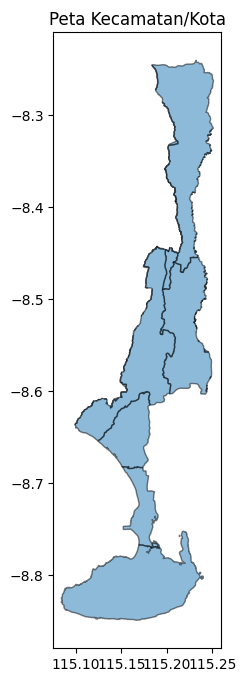

Hasil shapefile disimpan di: /content/hasil_kecamatan.shp


In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import os

# ========== SETUP PATH ==========
zip_file_path = '/content/kab badung.zip'  # Ganti sesuai filemu
unzip_dir = '/content/unzip_shp'  # Folder tujuan hasil unzip

# ========== UNZIP FILE ==========
os.makedirs(unzip_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("✅ Unzip selesai. Isi folder unzip:")
for root, dirs, files in os.walk(unzip_dir):
    for file in files:
        print("  ", file)

# ========== FUNGSI CARI SHAPEFILE ==========
def find_shp_file(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith('.shp'):
                return os.path.join(root, file)
    return None

# ========== BACA SHAPEFILE ==========
shp_path = find_shp_file(unzip_dir)
if shp_path:
    print(f"✅ File SHP ditemukan: {shp_path}")
    gdf = gpd.read_file(shp_path)

    # Tampilkan informasi dasar
    print("\nKolom yang tersedia:", gdf.columns)
    print("\n5 baris pertama data atribut:")
    print(gdf.head())

    # Plot peta
    gdf.plot(figsize=(8, 8), edgecolor='k', alpha=0.5)
    plt.title("Peta Kecamatan/Kota")
    plt.show()

    # Simpan hasil jika ingin
    output_path = '/content/hasil_kecamatan.shp'
    gdf.to_file(output_path)
    print(f"Hasil shapefile disimpan di: {output_path}")
else:
    print("❌ Tidak ditemukan file .shp dalam ZIP.")


Upload file ZIP shapefile curah hujan:


Saving klimatologi (1).zip to klimatologi (1) (2).zip
Unzip selesai. Isi folder unzip:
/content/unzip_curah_hujan
   Curah_Hujan_AR.shp.xml
   Curah_Hujan_AR.shx
   Curah_Hujan_AR.cpg
   Curah_Hujan_AR.sbx
   Curah_Hujan_AR.dbf
   Curah_Hujan_AR.shp
   Curah_Hujan_AR.sbn
   Curah_Hujan_AR.prj
File SHP ditemukan di: /content/unzip_curah_hujan/Curah_Hujan_AR.shp
Kolom yang tersedia: Index(['Curah_Huja', 'Sumber', 'geometry'], dtype='object')

5 baris pertama data atribut:
   Curah_Huja                  Sumber  \
0  1919 mm/th  Balai BMKG, Tahun 2016   

                                            geometry  
0  MULTIPOLYGON (((305699.967 9035266.347, 305695...  


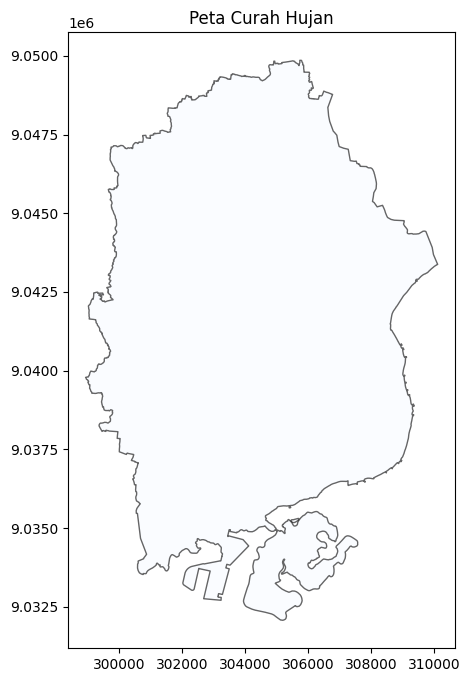

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt
import zipfile
import os
from google.colab import files

# Upload file ZIP shapefile curah hujan
print("Upload file ZIP shapefile curah hujan:")
uploaded = files.upload()

# Ambil nama file ZIP
zip_name = list(uploaded.keys())[0]

# Folder tujuan unzip
unzip_dir = '/content/unzip_curah_hujan'
os.makedirs(unzip_dir, exist_ok=True)

# Unzip file ZIP
with zipfile.ZipFile(zip_name, 'r') as zip_ref:
    zip_ref.extractall(unzip_dir)

print("Unzip selesai. Isi folder unzip:")
for root, dirs, files in os.walk(unzip_dir):
    print(root)
    for file in files:
        print("  ", file)

# Fungsi cari file .shp secara rekursif
def find_shp_file(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.lower().endswith('.shp'):
                return os.path.join(root, file)
    return None

# Cari file SHP
shp_path = find_shp_file(unzip_dir)
print(f"File SHP ditemukan di: {shp_path}")

# Baca file SHP
gdf_hujan = gpd.read_file(shp_path)

# Tampilkan kolom yang tersedia
print("Kolom yang tersedia:", gdf_hujan.columns)

# Tampilkan 5 baris pertama data atribut
print("\n5 baris pertama data atribut:")
print(gdf_hujan.head())

# Plot peta curah hujan
gdf_hujan.plot(figsize=(8,8), edgecolor='k', alpha=0.6, cmap='Blues')
plt.title("Peta Curah Hujan")
plt.show()

In [5]:
import pandas as pd

# Ganti dengan nama file Excel kamu
excel_path = '/content/ketinggian-ibu-kota-kabupaten.xlsx'  # GANTI sesuai nama file Excel kamu

# Baca semua sheet (opsional kalau multi-sheet)
# sheet_names = pd.ExcelFile(excel_path).sheet_names
# print("Sheet yang tersedia:", sheet_names)

# Baca sheet pertama (atau bisa sebut nama sheet)
df = pd.read_excel(excel_path)  # bisa tambah: sheet_name='nama_sheet'

# Tampilkan kolom yang tersedia
print("Kolom yang tersedia:", df.columns)

# Tampilkan 5 baris pertama
print("\n5 baris pertama data:")
print(df.head())

# (Opsional) Info tipe data
print("\nInfo dataframe:")
print(df.info())

Kolom yang tersedia: Index(['Ketinggian Ibu Kota Kabupaten, Nama dan Luas Danau  di Provinsi Bali',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')

5 baris pertama data:
  Ketinggian Ibu Kota Kabupaten, Nama dan Luas Danau  di Provinsi Bali  \
0  Latitude of Capital Cities, Name, and Width of...                     
1                                                NaN                     
2                                     Kabupaten/Kota                     
3                               Regency/Municipality                     
4                                           Jembrana                     

         Unnamed: 1 Unnamed: 2 Unnamed: 3  
0               NaN        NaN        NaN  
1               NaN        NaN        NaN  
2     Tinggi Tempat      Danau    Luasnya  
3  Latitude (meter)       Lake  Area (Ha)  
4                12          -          0  

Info dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data colu

In [6]:
import pandas as pd

# Path ke file Excel
excel_path = '/content/Luas Daerah dan Jumlah Pulau Menurut Kabupaten_Kota di Provinsi Bali, 2023.xlsx'  # GANTI sesuai nama file kamu

# Baca file Excel
df = pd.read_excel(excel_path)

# Cek kolom yang tersedia
print("Kolom yang tersedia:", df.columns)

# Asumsikan ada kolom 'LuasLahan' → bisa ganti sesuai nama kolom kamu
# Contoh nama kolom: 'Luas (Ha)', 'LuasLahan', 'Luas_area', dll
# GANTI DI SINI jika perlu:
nama_kolom_luas = 'Luas Wilayah (Km2)'  # GANTI kalau beda

# Cek apakah kolom ada
if nama_kolom_luas in df.columns:
    total_luas = df[nama_kolom_luas].sum()
    print(f"\nTotal luas lahan (sesuai kolom '{nama_kolom_luas}'): {total_luas:,.2f} satuan sesuai data (misalnya Ha atau m²)")

    # Tampilkan per record (opsional)
    print("\nData luas lahan per record:")
    print(df[[nama_kolom_luas]].head())
else:
    print(f"\nKolom '{nama_kolom_luas}' tidak ditemukan! Silakan cek nama kolom yang benar.")


Kolom yang tersedia: Index(['Kabupaten/Kota', 'Ibu Kota Wilayah', 'Luas Wilayah (Km2)',
       'Persentase Terhadap Luas Wilayah', 'Jumlah Pulau'],
      dtype='object')

Total luas lahan (sesuai kolom 'Luas Wilayah (Km2)'): 11,560.12 satuan sesuai data (misalnya Ha atau m²)

Data luas lahan per record:
   Luas Wilayah (Km2)
0              841.80
1             1013.88
2              418.62
3              368.00
4              315.00


In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd

# === Step 1: Baca data spatial dan tabular menggunakan library yang TEPAT ===
# Ganti path sesuai file kamu

# Raster data (DEM) - diasumsikan sudah dihitung slope di cell sebelumnya
tif_path = '/content/DEM SRTM 30M BALI.tif' # Ganti ke path file DEM asli
with rasterio.open(tif_path) as src:
    # Gunakan data slope yang sudah dihitung sebelumnya
    # Jika belum dihitung, hitung kembali dari DEM di sini
    dem = src.read(1)
    transform = src.transform
    pixel_size_x = transform.a
    pixel_size_y = -transform.e
    # Hitung gradien arah X dan Y
    grad_x, grad_y = np.gradient(dem, pixel_size_x, pixel_size_y)
    # Hitung slope dalam derajat
    slope_rad = np.arctan(np.sqrt(grad_x**2 + grad_y**2))
    slope = np.degrees(slope_rad)
    profile = src.profile  # Simpan profile untuk referensi/output

# Shapefile curah hujan (dibaca dengan geopandas)
rainfall_shp_path = '/content/unzip_curah_hujan/Curah_Hujan_AR.shp' # Pastikan ini path file SHP yang benar
try:
    gdf_hujan = gpd.read_file(rainfall_shp_path)
    print("Shapefile curah hujan berhasil dibaca.")
    print("Kolom curah hujan:", gdf_hujan.columns)
    # Anda perlu memutuskan kolom mana di gdf_hujan yang merepresentasikan nilai curah hujan
    # dan bagaimana cara merasternya.
except Exception as e:
    print(f"Gagal membaca shapefile curah hujan: {e}")
    gdf_hujan = None # Set None jika gagal

# Shapefile lereng (dibaca dengan geopandas) - Jika Anda sudah menghitung slope dari DEM, ini mungkin tidak perlu dibaca lagi sebagai shapefile lereng.
# Jika shapefile lereng ini adalah data lereng KELAS, maka perlakuan merasternya berbeda
slope_shp_path = '/content/unzip_slope/lereng/Kelas_Lereng_Bali.shp' # Pastikan ini path file SHP yang benar
try:
    gdf_lereng_shp = gpd.read_file(slope_shp_path)
    print("Shapefile kelas lereng berhasil dibaca.")
    print("Kolom kelas lereng:", gdf_lereng_shp.columns)
    # Anda perlu memutuskan kolom mana di gdf_lereng_shp yang merepresentasikan nilai kelas lereng
    # dan bagaimana cara merasternya (misalnya berdasarkan nilai atribut kelas).
except Exception as e:
     print(f"Gagal membaca shapefile kelas lereng: {e}")
     gdf_lereng_shp = None # Set None jika gagal


# Excel Luas Daerah (dibaca dengan pandas)
landuse_excel_path = '/content/Luas Daerah dan Jumlah Pulau Menurut Kabupaten_Kota di Provinsi Bali, 2023.xlsx'
try:
    df_landuse = pd.read_excel(landuse_excel_path)
    print("File Excel luas daerah berhasil dibaca.")
    print("Kolom luas daerah:", df_landuse.columns)
    # Data ini perlu dihubungkan ke data spasial (misalnya shapefile kabupaten/kota)
    # dan kemudian dirasterkan jika ingin digunakan dalam analisis raster
except Exception as e:
    print(f"Gagal membaca file Excel luas daerah: {e}")
    df_landuse = None # Set None jika gagal

# Excel Ketinggian Ibu Kota (dibaca dengan pandas)
elevation_excel_path = '/content/ketinggian-ibu-kota-kabupaten.xlsx'
try:
    df_elevation = pd.read_excel(elevation_excel_path)
    print("File Excel ketinggian berhasil dibaca.")
    print("Kolom ketinggian:", df_elevation.columns)
    # Data ini mungkin adalah titik (ibu kota). Perlu dihubungkan ke data spasial
    # dan dirasterkan (misalnya dengan interpolasi atau nilai terdekat)
except Exception as e:
    print(f"Gagal membaca file Excel ketinggian: {e}")
    df_elevation = None # Set None jika gagal

# --- Langkah Selanjutnya ---
# Setelah data berhasil dibaca menggunakan library yang tepat, langkah selanjutnya
# adalah merasterkan data vektor dan tabular agar memiliki resolusi dan extent
# yang sama dengan data DEM/Slope. Proses rasterisasi ini bisa bervariasi
# tergantung format dan struktur data vektor/tabular Anda.

# Contoh: Jika gdf_hujan punya kolom 'nilai_hujan', Anda perlu merasternya.
# rasterio dan geopandas punya fungsi untuk rasterisasi: rasterio.features.rasterize
# Namun, ini membutuhkan penyesuaian agar semua raster selaras.

# Untuk saat ini, kita akan berhenti setelah berhasil membaca data dengan library yang benar.
# Normalisasi dan perhitungan flood risk di bawah ini TIDAK akan berjalan
# karena 'rainfall', 'landuse', dan 'elevation' belum berupa array raster
# yang kompatibel dengan array 'slope'.

# === Step 2-5 (DIKOMENTARI KARENA DATA BELUM DALAM FORMAT RASTER KOMPATIBEL) ===
# Normalisasi dan perhitungan flood risk memerlukan semua layer dalam format raster
# dengan ukuran dan extent yang sama.

# def normalize(arr):
#     # Perlu memastikan nodata treatment yang benar untuk SEMUA layer
#     # arr[arr == src.nodata] = np.nan # src.nodata hanya dari raster terakhir yang dibuka
#     # Alternatif: tangani NaN atau nodata secara konsisten
#     arr_cleaned = arr[~np.isnan(arr)] # Abaikan NaN untuk min/max
#     if arr_cleaned.size == 0: # Hindari error jika array kosong setelah hapus NaN
#         return arr
#     return (arr - np.min(arr_cleaned)) / (np.max(arr_cleaned) - np.min(arr_cleaned))

# Jika semua layer sudah dalam format raster (misal: numpy array) dan ukurannya sama:
# rainfall_norm = normalize(rainfall_raster) # Ganti dengan array raster curah hujan
# slope_norm = normalize(slope) # Gunakan array slope yang sudah ada
# landuse_norm = normalize(landuse_raster) # Ganti dengan array raster penggunaan lahan
# elevation_norm = normalize(elevation_raster) # Ganti dengan array raster elevasi

# === Step 3: Definisikan bobot faktor ===
# w_rainfall = 0.4
# w_slope = 0.2
# w_landuse = 0.2
# w_elevation = 0.2

# === Step 4: Hitung skor rawan banjir ===
# Pastikan semua array dinormalisasi punya ukuran yang sama
# flood_risk = (w_rainfall * rainfall_norm +
#               w_slope * (1 - slope_norm) +      # Landai lebih rawan
#               w_landuse * landuse_norm +        # Misalnya lahan impermeabel → lebih rawan
#               w_elevation * (1 - elevation_norm))  # Elevasi rendah lebih rawan

# === Step 5: Visualisasi peta rawan banjir ===
# plt.figure(figsize=(10, 8))
# plt.imshow(flood_risk, cmap='Reds', interpolation='none', extent=raster_extent) # Sesuaikan extent
# plt.colorbar(label='Indeks Rawan Banjir (0-1)')
# plt.title('Peta Prediksi Rawan Banjir')
# plt.axis('off')
# plt.show()

print("\n--- Perhatian ---")
print("Data shapefile dan Excel berhasil dibaca menggunakan geopandas/pandas.")
print("Namun, normalisasi dan perhitungan skor rawan banjir masih dikomentari.")
print("Langkah selanjutnya adalah merasterkan 'gdf_hujan', 'gdf_lereng_shp', 'df_landuse', dan 'df_elevation'")
print("agar selaras dengan raster 'slope' (dari DEM) sebelum melanjutkan analisis.")

Shapefile curah hujan berhasil dibaca.
Kolom curah hujan: Index(['Curah_Huja', 'Sumber', 'geometry'], dtype='object')
Gagal membaca shapefile kelas lereng: Unable to open /content/unzip_slope/lereng/Kelas_Lereng_Bali.shx or /content/unzip_slope/lereng/Kelas_Lereng_Bali.SHX. Set SHAPE_RESTORE_SHX config option to YES to restore or create it.
File Excel luas daerah berhasil dibaca.
Kolom luas daerah: Index(['Kabupaten/Kota', 'Ibu Kota Wilayah', 'Luas Wilayah (Km2)',
       'Persentase Terhadap Luas Wilayah', 'Jumlah Pulau'],
      dtype='object')
File Excel ketinggian berhasil dibaca.
Kolom ketinggian: Index(['Ketinggian Ibu Kota Kabupaten, Nama dan Luas Danau  di Provinsi Bali',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')

--- Perhatian ---
Data shapefile dan Excel berhasil dibaca menggunakan geopandas/pandas.
Namun, normalisasi dan perhitungan skor rawan banjir masih dikomentari.
Langkah selanjutnya adalah merasterkan 'gdf_hujan', 'gdf_lereng_shp', 'df_landu

In [2]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
from shapely.geometry import mapping
import pandas as pd # Import pandas if not already imported

# 1. Baca shapefile kecamatan (Badung)
gdf_kecamatan = gpd.read_file("/content/hasil_kecamatan.shp")

# Cek nama kolom untuk kecamatan
print("Kolom di shapefile kecamatan:", gdf_kecamatan.columns)

# Tampilkan semua nilai unik dari kolom nama
print("Nilai unik dari kolom 'NAMOBJ':", gdf_kecamatan["NAMOBJ"].unique())

# Ganti dengan nama yang sesuai kalau ternyata bukan "Badung"
nama_kecamatan_dipilih = "Kuta"  # contoh jika ternyata nama kecamatannya Kuta, bukan Badung
gdf_badung = gdf_kecamatan[gdf_kecamatan["NAMOBJ"] == nama_kecamatan_dipilih]

if gdf_badung.empty:
    raise ValueError(f"Tidak ditemukan kecamatan dengan nama '{nama_kecamatan_dipilih}' di kolom 'NAMOBJ'")

# 2. Baca shapefile curah hujan
gdf_curah = gpd.read_file("/content/unzip_curah_hujan/Curah_Hujan_AR.shp")
print("Kolom curah hujan:", gdf_curah.columns)

# 3. Baca DEM
dem_path = "/content/DEM SRTM 30M BALI.tif"
with rasterio.open(dem_path) as dem_src:
    dem_crs = dem_src.crs
    print("CRS dari DEM:", dem_crs)

# 4. Samakan CRS
gdf_badung = gdf_badung.to_crs(dem_crs)
gdf_curah = gdf_curah.to_crs(dem_crs)

# 5. Masking DEM berdasarkan kecamatan
with rasterio.open(dem_path) as dem_src:
    geometry = [mapping(geom) for geom in gdf_badung.geometry]
    try:
        dem_masked, dem_transform = rasterio.mask.mask(dem_src, geometry, crop=True)
        dem_data = dem_masked[0]
        dem_data = np.where(dem_data == dem_src.nodata, np.nan, dem_data)
        mean_elevasi = np.nanmean(dem_data)
        print("Rata-rata elevasi:", mean_elevasi)
    except Exception as e:
        raise ValueError(f"Gagal memmask DEM: {e}")

# 6. Intersect curah hujan dan kecamatan
gdf_curah_badung = gpd.overlay(gdf_curah, gdf_badung, how='intersection')
print("Jumlah fitur hasil overlay curah hujan:", len(gdf_curah_badung))

# Cek apakah kolom curah hujan ada
if "Curah_Huja" not in gdf_curah_badung.columns:
    # Try checking for variations in the column name case or spacing
    found_col = None
    for col in gdf_curah_badung.columns:
        if col.lower().strip() == "curah_huja".lower().strip():
            found_col = col
            break
    if found_col:
        print(f"Warning: Column 'Curah_Huja' not found exactly, but found '{found_col}'. Using this column.")
        curah_hujan_col = found_col
    else:
         raise ValueError("Kolom 'Curah_Huja' tidak ditemukan setelah overlay. Silakan periksa nama kolom yang benar.")
else:
    curah_hujan_col = "Curah_Huja"

# --- Perubahan di sini ---
# Konversi kolom curah hujan ke numerik
# Hapus karakter non-numerik (seperti ' mm/th')
gdf_curah_badung[curah_hujan_col] = gdf_curah_badung[curah_hujan_col].astype(str).str.replace('[^0-9.]', '', regex=True)
# Konversi ke tipe float
gdf_curah_badung[curah_hujan_col] = pd.to_numeric(gdf_curah_badung[curah_hujan_col], errors='coerce')

# Handle potential NaN values after conversion (if some strings couldn't be converted)
if gdf_curah_badung[curah_hujan_col].isnull().any():
    print("Warning: Some values in the curah hujan column could not be converted to numeric (became NaN). These will be ignored in the mean calculation.")

# Hitung rata-rata curah hujan, abaikan NaN jika ada
mean_curah = gdf_curah_badung[curah_hujan_col].mean()
print("Rata-rata curah hujan:", mean_curah)

# 7. Hitung indeks rawan banjir
# Pastikan mean_curah bukan NaN sebelum perhitungan
if pd.isna(mean_curah):
    print("Warning: Rata-rata curah hujan adalah NaN. Indeks rawan banjir tidak dihitung.")
    indeks_rawan = np.nan
else:
    indeks_rawan = 0.2 * (1 - (mean_elevasi / 1000)) + 0.8 * (mean_curah / 3000)  # diasumsikan nilai normalisasi
    print("Indeks Rawan Banjir:", indeks_rawan)

Kolom di shapefile kecamatan: Index(['KDPPUM', 'NAMOBJ', 'REMARK', 'KDPBPS', 'FCODE', 'LUASWH', 'UUPP',
       'SRS_ID', 'LCODE', 'METADATA', 'KDEBPS', 'KDEPUM', 'KDCBPS', 'KDCPUM',
       'KDBBPS', 'KDBPUM', 'WADMKD', 'WIADKD', 'WADMKC', 'WIADKC', 'WADMKK',
       'WIADKK', 'WADMPR', 'WIADPR', 'TIPADM', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')
Nilai unik dari kolom 'NAMOBJ': ['Abiansemal' 'Baturiti' 'Kediri' 'Kuta' 'Kuta Selatan' 'Kuta Utara'
 'Marga' 'Mengwi' 'Payangan' 'Petang' 'Sukawati' 'Ubud']
Kolom curah hujan: Index(['Curah_Huja', 'Sumber', 'geometry'], dtype='object')
CRS dari DEM: EPSG:4326
Rata-rata elevasi: 7.20361151339609
Jumlah fitur hasil overlay curah hujan: 1
Rata-rata curah hujan: 1919.0
Indeks Rawan Banjir: 0.7102926110306542


In [12]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
from shapely.geometry import mapping
from tqdm import tqdm

# 1. Load semua data
gdf_kecamatan = gpd.read_file("/content/hasil_kecamatan.shp")
gdf_curah = gpd.read_file("/content/unzip_curah_hujan/Curah_Hujan_AR.shp")
dem_path = "/content/DEM SRTM 30M BALI.tif"

# 2. Baca CRS dari DEM
with rasterio.open(dem_path) as dem_src:
    dem_crs = dem_src.crs

# 3. Samakan CRS
gdf_kecamatan = gdf_kecamatan.to_crs(dem_crs)
gdf_curah = gdf_curah.to_crs(dem_crs)

# 4. Buat list untuk hasil
hasil_prediksi = []

# 5. Iterasi tiap kecamatan
for idx, row in tqdm(gdf_kecamatan.iterrows(), total=len(gdf_kecamatan)):
    nama_kec = row["NAMOBJ"]
    geom = row.geometry

    # 5.1. Hitung rata-rata elevasi
    try:
        with rasterio.open(dem_path) as dem_src:
            geometry = [mapping(geom)]
            dem_masked, dem_transform = rasterio.mask.mask(dem_src, geometry, crop=True)
            dem_data = dem_masked[0]
            dem_data = np.where(dem_data == dem_src.nodata, np.nan, dem_data)
            mean_elevasi = np.nanmean(dem_data)
    except:
        mean_elevasi = np.nan

    # 5.2. Hitung rata-rata curah hujan (intersect curah dengan kecamatan)
    try:
        gdf_curah_kec = gpd.overlay(gdf_curah, gpd.GeoDataFrame(geometry=[geom], crs=gdf_kecamatan.crs), how='intersection')
        if "Curah_Huja" in gdf_curah_kec.columns and not gdf_curah_kec.empty:
            mean_curah = gdf_curah_kec["Curah_Huja"].mean()
        else:
            mean_curah = np.nan
    except:
        mean_curah = np.nan

    # 5.3. Hitung indeks rawan banjir jika data lengkap
    if not np.isnan(mean_elevasi) and not np.isnan(mean_curah):
        indeks = 0.2 * (1 - (mean_elevasi / 1000)) + 0.8 * (mean_curah / 3000)
    else:
        indeks = np.nan

    hasil_prediksi.append({
        "NAMOBJ": nama_kec,
        "mean_elevasi": mean_elevasi,
        "mean_curah": mean_curah,
        "indeks_rawan": indeks,
        "geometry": geom
    })

# 6. Simpan ke GeoDataFrame baru
gdf_hasil = gpd.GeoDataFrame(hasil_prediksi, crs=gdf_kecamatan.crs)

# 7. Tampilkan 5 hasil teratas
print(gdf_hasil[["NAMOBJ", "mean_elevasi", "mean_curah", "indeks_rawan"]].head())

# 8. (Opsional) Simpan ke file shapefile/GeoJSON
gdf_hasil.to_file("/content/hasil_prediksi_rawan_banjir.shp")


100%|██████████| 12/12 [00:00<00:00, 40.39it/s]
<ipython-input-12-ca642f00f19c>:71: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_hasil.to_file("/content/hasil_prediksi_rawan_banjir.shp")


         NAMOBJ  mean_elevasi  mean_curah  indeks_rawan
0    Abiansemal    172.766758         NaN           NaN
1      Baturiti    837.909427         NaN           NaN
2        Kediri     63.195373         NaN           NaN
3          Kuta      7.203612         NaN           NaN
4  Kuta Selatan     81.257216         NaN           NaN


/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'mean_elevasi' to 'mean_eleva'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'indeks_rawan' to 'indeks_raw'
  ogr_write(


Using column 'Curah_Huja' for rainfall data.


Menghitung elevasi rata-rata: 100%|██████████| 12/12 [00:00<00:00, 30.31it/s]
<ipython-input-17-3644ca0a645c>:146: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_hasil.to_file(output_path)
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'mean_elevasi' to 'mean_eleva'
  ogr_write(
/usr/local/lib/python3.11/dist-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'indeks_rawan' to 'indeks_raw'
  ogr_write(



Jumlah fitur hasil overlay curah hujan dengan kecamatan: 4
✅ Proses selesai. Hasil disimpan di: /content/hasil_prediksi_rawan_banjir_fix.shp

Generating plot...


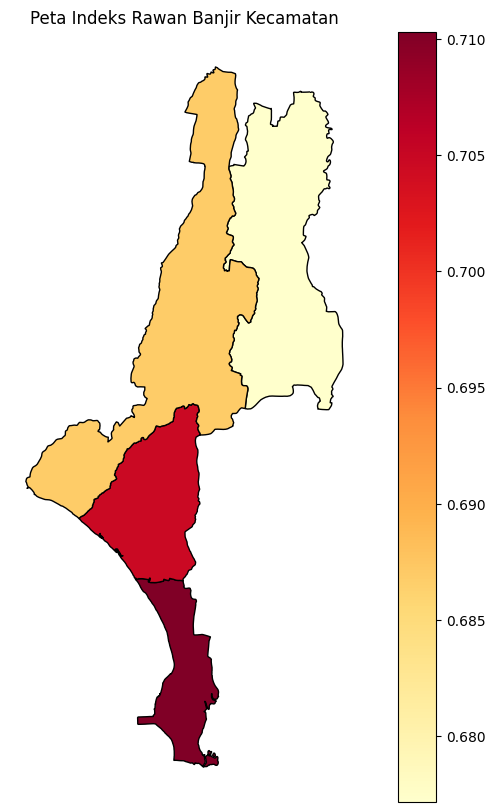

In [17]:
import geopandas as gpd
import rasterio
import rasterio.mask
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
from tqdm import tqdm
import os
from rasterio.features import geometry_mask
import pandas as pd

# Load data kecamatan dan curah hujan
gdf_kecamatan = gpd.read_file("/content/hasil_kecamatan.shp")
gdf_curah = gpd.read_file("/content/unzip_curah_hujan/Curah_Hujan_AR.shp")

# Load DEM
dem_path = "/content/DEM SRTM 30M BALI.tif"
# Open the DEM outside the loop for efficiency
try:
    dem = rasterio.open(dem_path)
except rasterio.errors.RasterioIOError as e:
    print(f"Error opening DEM file: {e}")
    print("Please ensure the DEM file exists at the specified path.")
    exit() # Exit or handle appropriately if DEM is crucial

# Sesuaikan CRS
gdf_kecamatan = gdf_kecamatan.to_crs(dem.crs)
gdf_curah = gdf_curah.to_crs(dem.crs)

# --- Handle Curah_Hujan column to ensure it's numeric ---
# Use the conversion logic from the working cell (ipython-input-2-dac93098a925)
curah_hujan_col_name = None
# Find the actual rainfall column name case-insensitively
for col in gdf_curah.columns:
    if col.lower().strip() == "curah_huja".lower().strip() or col.lower().strip() == "curah_hujan".lower().strip():
        curah_hujan_col_name = col
        break

if curah_hujan_col_name is None:
    print("Error: Cannot find a column resembling 'Curah_Huja' or 'Curah_Hujan' in the rainfall shapefile.")
    print("Available columns:", gdf_curah.columns)
    dem.close() # Close DEM before exiting
    exit()

print(f"Using column '{curah_hujan_col_name}' for rainfall data.")

# Convert the rainfall column to numeric, coercing errors to NaN
gdf_curah[curah_hujan_col_name] = gdf_curah[curah_hujan_col_name].astype(str).str.replace('[^0-9.]', '', regex=True)
gdf_curah[curah_hujan_col_name] = pd.to_numeric(gdf_curah[curah_hujan_col_name], errors='coerce')

# Report how many values became NaN during conversion
nan_count = gdf_curah[curah_hujan_col_name].isnull().sum()
if nan_count > 0:
    print(f"Warning: {nan_count} values in '{curah_hujan_col_name}' could not be converted to numeric and were set to NaN.")
# --- End of Curah_Hujan handling ---


# Hitung elevasi rata-rata tiap kecamatan
mean_elevasi = []

for idx, row in tqdm(gdf_kecamatan.iterrows(), total=len(gdf_kecamatan), desc="Menghitung elevasi rata-rata"):
    geom = row.geometry
    try:
        # --- MODIFIKASI DI SINI ---
        # Lakukan masking tanpa filled=True terlebih dahulu
        # Kemudian, set nilai di luar mask ke NaN secara manual
        out_image, out_transform = rasterio.mask.mask(dem, [geom], crop=True) # Remove filled=True and nodata=np.nan here

        # Dapatkan mask boolean dari geometri
        mask = geometry_mask([geom], out_image.shape[1:], out_transform, invert=True)

        # Aplikasikan mask dan set nilai di luar mask ke NaN
        data = out_image[0].astype(float) # Konversi ke float untuk menampung NaN
        data[~mask] = np.nan # Set nilai di luar mask ke NaN

        # Tangani nilai nodata asli dari DEM (jika ada)
        original_nodata = dem.nodata
        if original_nodata is not None:
             data[data == original_nodata] = np.nan


        # Hitung rata-rata elevasi, abaikan NaN
        if np.nansum(~np.isnan(data)) > 0: # Check if there are any non-NaN values left
            mean_val = np.nanmean(data)
        else:
            mean_val = np.nan # Return NaN if masked area is all nodata or empty
        # --- AKHIR MODIFIKASI ---

    except Exception as e:
        print(f"Warning: Error processing elevation for feature {idx}: {e}")
        mean_val = np.nan
    mean_elevasi.append(mean_val)

gdf_kecamatan["mean_elevasi"] = mean_elevasi

# Close the DEM dataset after processing elevasi
dem.close()

# --- Hitung rata-rata curah hujan per kecamatan ---
# Use spatial join of polygons with 'intersects' predicate
# This is more robust than using centroids.
gdf_join_curah = gpd.sjoin(gdf_curah, gdf_kecamatan[['NAMOBJ', 'geometry']], predicate='intersects', how='inner')

# Removed the problematic print statement section
print(f"\nJumlah fitur hasil overlay curah hujan dengan kecamatan: {len(gdf_join_curah)}")
if gdf_join_curah.empty:
    print("Warning: Spatial join between rainfall and kecamatan is empty. Rainfall data will be NaN for all kecamatans.")

# Hitung rata-rata curah hujan per kecamatan
# Use the determined rainfall column name
if not gdf_join_curah.empty:
    mean_curah = gdf_join_curah.groupby("NAMOBJ")[curah_hujan_col_name].mean().reset_index()
    mean_curah.columns = ["NAMOBJ", "mean_curah"]
else:
    # Create an empty DataFrame with the expected columns if the join was empty
    mean_curah = pd.DataFrame(columns=["NAMOBJ", "mean_curah"])

# Gabungkan ke hasil akhir
gdf_hasil = gdf_kecamatan.merge(mean_curah, on="NAMOBJ", how="left")

# Hitung indeks rawan banjir
# Normalisasi sederhana: elevasi dibagi 1000, curah dibagi 3000 (bisa disesuaikan)
# Ensure columns exist and handle potential NaNs from merge
gdf_hasil["indeks_rawan"] = np.nan # Initialize with NaN

# Only calculate index where both elevation and rainfall data are available
has_data_mask = gdf_hasil["mean_elevasi"].notna() & gdf_hasil["mean_curah"].notna()

if has_data_mask.any():
    gdf_hasil.loc[has_data_mask, "indeks_rawan"] = (
        0.2 * (1 - (gdf_hasil.loc[has_data_mask, "mean_elevasi"] / 1000)) +
        0.8 * (gdf_hasil.loc[has_data_mask, "mean_curah"] / 3000)
    )
else:
    print("Warning: No kecamatan has both valid elevation and rainfall data after merging. 'indeks_rawan' will be all NaN.")


# Simpan hasil
output_path = "/content/hasil_prediksi_rawan_banjir_fix.shp"
try:
    # Check if output directory exists
    output_dir = os.path.dirname(output_path)
    if output_dir and not os.path.exists(output_dir):
        os.makedirs(output_dir)

    gdf_hasil.to_file(output_path)
    print("✅ Proses selesai. Hasil disimpan di:", output_path)
except Exception as e:
    print(f"Error saving output file: {e}")


# Plot hasil untuk cek visual
# Add check if 'indeks_rawan' column is all NaN before plotting
if gdf_hasil["indeks_rawan"].isnull().all():
    print("\nWarning: 'indeks_rawan' column contains only NaN values. Plotting skipped.")
else:
    print("\nGenerating plot...")
    fig, ax = plt.subplots(figsize=(10, 10))
    # Use dropna() to exclude features with NaN 'indeks_rawan' from plotting
    # Or use missing_kwds in plot function for explicit handling of missing values if desired
    gdf_hasil.dropna(subset=["indeks_rawan"]).plot(column="indeks_rawan", ax=ax, legend=True, cmap="YlOrRd", edgecolor='black')
    plt.title("Peta Indeks Rawan Banjir Kecamatan")
    plt.axis('off')
    plt.show()